In [1]:
"""
Starting with a given image, try to create one good for a word cloud
"""

'\nStarting with a given image, try to create one good for a word cloud\n'

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image, ImageOps, ImageEnhance
import cv2

In [65]:
def pillow_pipeline(image_path):
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    columns = 4
    rows = 1
    orig_image = Image.open(image_path)
    width, height = orig_image.size
    if width > height:
        orig_image = orig_image.rotate(-90)
    print("pillow original:")
    fig.add_subplot(1, 4, 1)
    plt.imshow(orig_image)
    grayscale_image = orig_image.convert('L')
    print("grayscale:")
    fig.add_subplot(1, 4, 2)
    imshow(grayscale_image)
    enhancer = ImageEnhance.Contrast(grayscale_image)
    cont_image = enhancer.enhance(2.0)
    print("enhanced grayscale:")
    fig.add_subplot(1, 4, 3)
    imshow(cont_image)
    print("thresholded:")
    threshold = 128
    cont_bw_image = cont_image.point(lambda p: p > threshold and 255)
    fig.add_subplot(1, 4, 4)
    imshow(cont_bw_image)
    plt.show()
    return cont_bw_image

pillow original:
grayscale:
enhanced grayscale:
thresholded:


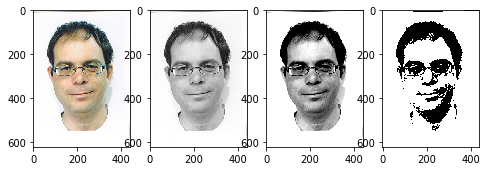

In [66]:
image_path = "C:/Users/user/Downloads/yuval_passport_sep_2011.jpg"

cont_bw_image = pillow_pipeline(image_path)

pillow original:
grayscale:
enhanced grayscale:
thresholded:


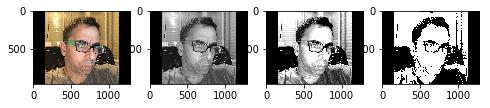

In [67]:
image_path = "C:/Users/user/Downloads/image - dori oryan.jpg"
cont_bw_image = pillow_pipeline(image_path)

In [97]:
def opencv_pipeline(image_path):
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    columns = 4
    rows = 1
    orig_image = cv2.imread(image_path)
    height, width = orig_image.shape[:2]
    if width > height:
        orig_image = orig_image.rotate(-90)
    print("cv2 original:")
    fig.add_subplot(1, 4, 1)
    rgb_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_image)
    grayscale_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2GRAY)
    print("grayscale:")
    fig.add_subplot(1, 4, 2)
    imshow(grayscale_image, "gray")
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cont_image = clahe.apply(grayscale_image)
    #cont_image = cv2.equalizeHist(grayscale_image)
    print("enhanced grayscale:")
    fig.add_subplot(1, 4, 3)
    imshow(cont_image, "gray")
    retval, cont_bw_image = cv2.threshold(cont_image, 128, 255, cv2.THRESH_BINARY)
#     print("thresholded:")
#     threshold = 128
#     cont_bw_image = cont_image.point(lambda p: p > threshold and 255)
    fig.add_subplot(1, 4, 4)
    imshow(cont_bw_image, "gray")
    plt.show()

cv2 original:
grayscale:
enhanced grayscale:


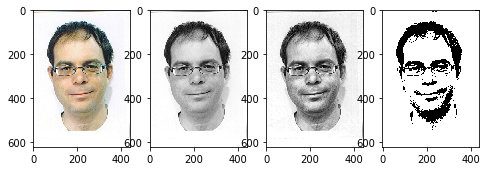

In [98]:
image_path = "C:/Users/user/Downloads/yuval_passport_sep_2011.jpg"
#image_path = "C:/Users/user/Downloads/image - dori oryan.jpg"
cont_bw_image = opencv_pipeline(image_path)

cv2 original:
grayscale:
enhanced grayscale:


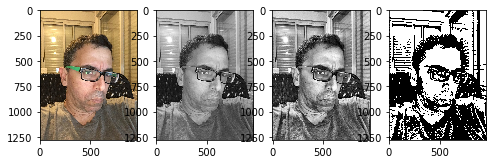

In [99]:
#image_path = "C:/Users/user/Downloads/yuval_passport_sep_2011.jpg"
image_path = "C:/Users/user/Downloads/image - dori oryan.jpg"
cont_bw_image = opencv_pipeline(image_path)